In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.arange(1,21)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
np.random.rand(20) *2

array([1.12622409, 1.08679127, 1.38711142, 1.67795802, 1.76328604,
       0.5457735 , 1.82494909, 0.9021203 , 1.99100458, 1.3263572 ,
       0.83746849, 0.16454499, 1.5228058 , 1.4354849 , 0.9935621 ,
       1.80347459, 1.5340586 , 0.99110742, 1.82778053, 1.95469176])

In [ ]:
y = 2*X +5  + np.random.rand(20)*2
y

array([ 7.01104967, 10.63207671, 11.87994552, 13.49461191, 16.29135501,
       18.74760136, 19.51927725, 22.64378289, 23.96015245, 25.7613119 ,
       28.14185341, 30.02555268, 32.08510551, 34.8830371 , 35.84693782,
       37.56108642, 39.41177069, 42.49973753, 44.89613899, 46.61686949])

In [ ]:
def loss(X,y,w):
    y_pred = w*X
    lo = (y-y_pred)**2
    return np.mean(lo)

In [ ]:
loss(X,y, w=2)

37.435476097674695

In [ ]:
w_list = np.arange(-3,3.5,0.5)
w_list

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ])

In [ ]:
loss_list = []
for w in w_list:
    loss_val = loss(X,y,w)
    loss_list.append(loss_val)

In [ ]:
loss_list

[4273.561642987535,
 3527.0740262985505,
 2852.336409609564,
 2249.3487929205776,
 1718.1111762315916,
 1258.6235595426056,
 870.8859428536194,
 554.8983261646332,
 310.66070947564697,
 138.17309278666085,
 37.435476097674695,
 8.447859408688547,
 51.210242719702386]

Text(0, 0.5, 'Average loss')

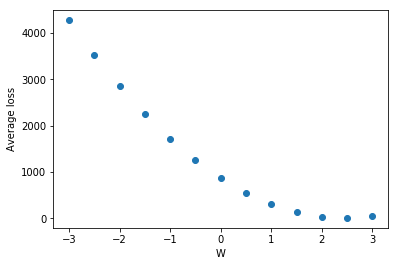

In [ ]:
plt.scatter(w_list, loss_list)
plt.xlabel("W")
plt.ylabel("Average loss")

# Building Model

## Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([2.02587243])

In [ ]:
model.intercept_

5.823802236057453

In [ ]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
X.reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]])

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
df = pd.DataFrame(data = data['data'], columns = data['feature_names'])
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [ ]:
df["y"] = data['target']

In [ ]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT     y
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [ ]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT     y
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [ ]:
X = df.drop("y",axis=1)
X.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [ ]:
X.shape

(506, 13)

In [ ]:
X.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
y = df["y"]

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso

In [ ]:
model = Lasso(normalize=True, alpha=0.1)

In [ ]:
model.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
np.abs(model.coef_)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       2.95469455, 0.        , 0.        , 0.        , 0.        ,
       0.24795837, 0.        , 0.42817439])

In [ ]:
feat_imp = np.argsort(model.coef_)[::-1]
feat_imp

array([ 5, 11,  9,  8,  7,  6,  4,  3,  2,  1,  0, 10, 12])

In [ ]:
X.columns[feat_imp]

Index(['RM', 'B', 'TAX', 'RAD', 'DIS', 'AGE', 'NOX', 'CHAS', 'INDUS', 'ZN',
       'CRIM', 'PTRATIO', 'LSTAT'],
      dtype='object')

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'y'],
      dtype='object')

In [ ]:
np.log(0.9999)

-0.00010000500033334732

In [ ]:
np.log(0.05)

-2.995732273553991